<a href="https://colab.research.google.com/github/Fathy-Elaraby/flutter-study-jam/blob/master/HWRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
!mkdir /root/.kaggle
!ls -f /root/

.bashrc  ..	   .kaggle  .keras  .config    .ipython  .npm
.	 .profile  .local   .cache  .node-gyp  .jupyter  .gsutil


In [8]:
!cp   kaggle.json /root/.kaggle/kaggle.json

In [9]:

!chmod 600 /root/.kaggle/kaggle.json

In [10]:
! mkdir  /content/data/

mkdir: cannot create directory ‘/content/data/’: File exists


In [11]:
!kaggle datasets download -d crawford/emnist

 99% 1.22G/1.24G [00:12<00:00, 116MB/s]
100% 1.24G/1.24G [00:12<00:00, 104MB/s]


In [12]:
!unzip /content/emnist.zip -d /content/data/

Archive:  /content/emnist.zip
  inflating: /content/data/emnist-balanced-mapping.txt  
  inflating: /content/data/emnist-balanced-test.csv  
  inflating: /content/data/emnist-balanced-train.csv  
  inflating: /content/data/emnist-byclass-mapping.txt  
  inflating: /content/data/emnist-byclass-test.csv  
  inflating: /content/data/emnist-byclass-train.csv  
  inflating: /content/data/emnist-bymerge-mapping.txt  
  inflating: /content/data/emnist-bymerge-test.csv  
  inflating: /content/data/emnist-bymerge-train.csv  
  inflating: /content/data/emnist-digits-mapping.txt  
  inflating: /content/data/emnist-digits-test.csv  
  inflating: /content/data/emnist-digits-train.csv  
  inflating: /content/data/emnist-letters-mapping.txt  
  inflating: /content/data/emnist-letters-test.csv  
  inflating: /content/data/emnist-letters-train.csv  
  inflating: /content/data/emnist-mnist-mapping.txt  
  inflating: /content/data/emnist-mnist-test.csv  
  inflating: /content/data/emnist-mnist-train.csv 

In [13]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [14]:
train=pd.read_csv('data/emnist-balanced-train.csv',header=None)
test=pd.read_csv('data/emnist-balanced-test.csv',header=None)
print('trainData : ')
train.head()

trainData : 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
train_data=train.iloc[:100000,1:]
train_label=train.iloc[:100000,0]
vaild_data=train.iloc[100000:,1:]
vaild_label=train.iloc[100000:,0]
test_data=test.iloc[:,1:]
test_label=test.iloc[:,0]

print('trainData : ',train_data.shape[0],' validData  : ',vaild_data.shape[0],' testData : ',test_data.shape[0])

trainData :  100000  validData  :  12800  testData :  18800


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


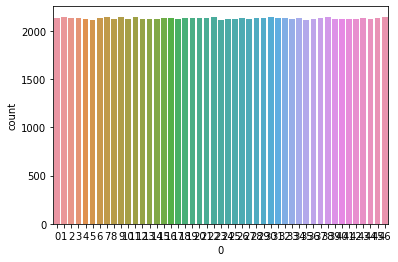

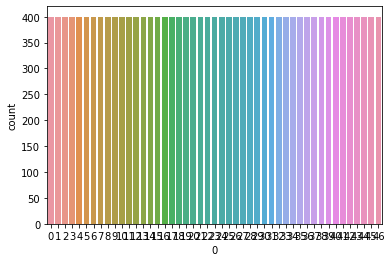

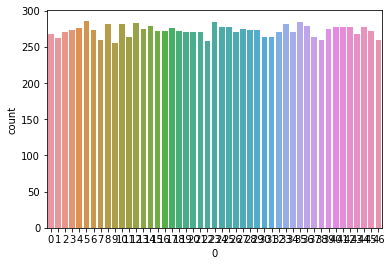

In [17]:

import seaborn as sns
sns.countplot(train_label.iloc[:])
# %matplotlib inline
plt.show()

sns.countplot(test_label.iloc[:])
plt.show()
sns.countplot(vaild_label.iloc[:])
plt.show()
# print(dict_characters)

In [18]:
train_label = pd.get_dummies(train_label)
test_label = pd.get_dummies(test_label)
vaild_label=pd.get_dummies(vaild_label)
train_label.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
train_data=train_data.values
train_label=train_label.values
vaild_data=vaild_data.values
vaild_label=vaild_label.values
test_data=test_data.values
test_label=test_label.values


del train ,test

In [20]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    
    
    return image.reshape([28 * 28])
train_data = np.apply_along_axis(rotate, 1, train_data)/255
vaild_data=np.apply_along_axis(rotate,1,vaild_data)/255
test_data = np.apply_along_axis(rotate, 1, test_data)/255

In [21]:
test_data=test_data.reshape([test_data.shape[0],28,28,1])
train_data=train_data.reshape([train_data.shape[0],28,28,1])
vaild_data=vaild_data.reshape([vaild_data.shape[0],28,28,1])
print(test_data.shape)
print(train_data.shape)
print(vaild_data.shape)
print(len(test_data))

(18800, 28, 28, 1)
(100000, 28, 28, 1)
(12800, 28, 28, 1)
18800


In [22]:
def processing_img(img):
    img=img.reshape([28 , 28])
    img=np.round(img)
    img=img.reshape([28,28,1])
    return img

def processing_imgs(imgs):
    list_of_imgs=[processing_img(img) for img in imgs]
    return list_of_imgs

In [26]:
trainP_data = np.asarray(processing_imgs(train_data))
vaildP_data=np.asarray(processing_imgs(vaild_data))
testP_data = np.asarray(processing_imgs(test_data))

In [29]:
mappings = []
def load_char_mappings(mapping_path):
    """
    load EMNIST character mappings. This maps a label to the correspondent byte value of the given character
    return: the dictionary of label mappings
    """
#     mappings = []
    with open(mapping_path) as f:
        for line in f:
            (key, val) = line.split()
            temp= chr(int(val))
            mappings.append(temp)

    return mappings

In [33]:
mappings=load_char_mappings('data/emnist-balanced-mapping.txt')

In [56]:
mappings

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'd',
 'e',
 'f',
 'g',
 'h',
 'n',
 'q',
 'r',
 't']

the character is :  I


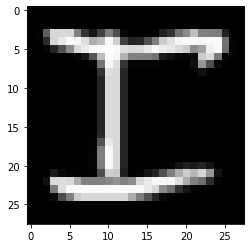

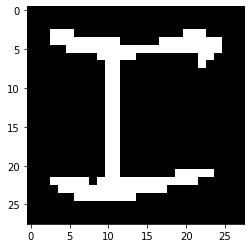

In [57]:
import matplotlib.pyplot as plt
# % matplotlib inline
# print(train_data[25].reshape([28,28]))
print("the character is : " ,mappings[np.argmax(train_label[1005])])
plt.imshow(train_data[1005].reshape([28, 28]),cmap='gray')
plt.show()
plt.imshow(trainP_data[1005].reshape([28, 28]),cmap='gray')
plt.show()

# list = random.sample(range(29000), 15)
# for i in list:
#     print(".......   label : ",train_label[i])
#     plt.imshow(train_data[i].reshape([28, 28]), cmap='Greys_r')
#     plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
print(train_data.shape)
print(trainP_data.shape)

(100000, 28, 28, 1)
(100000, 28, 28, 1)


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [58]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(28, 28, 1)))
cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=1))
cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.2))
# cnn_model.add(BatchNormalization())
# cnn_model.add(Dense(256, activation='relu'))
# cnn_model.add(Dropout(0.4))
cnn_model.add(Dense(47, activation='softmax')) 

cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [59]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
from keras.callbacks import ModelCheckpoint 
epochs = 10


checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.CNN.hdf5', 
                               verbose=1, save_best_only=True)

cnn_model.fit(trainP_data, train_label, validation_data=(vaildP_data, vaild_label), epochs=epochs,callbacks=[checkpointer],
          batch_size=20, verbose=1)

Train on 100000 samples, validate on 12800 samples
Epoch 1/10
100000/100000 [==============================] - 244s 2ms/step - loss: 0.7687 - accuracy: 0.7546 - val_loss: 0.4487 - val_accuracy: 0.8388

Epoch 00001: val_loss improved from inf to 0.44867, saving model to saved_models/weights.best.CNN.hdf5
Epoch 2/10
 76840/100000 [======================>.......] - ETA: 55s - loss: 0.4994 - accuracy: 0.8281Train on 100000 samples, validate on 12800 samples
Epoch 1/10
100000/100000 [==============================] - 244s 2ms/step - loss: 0.7687 - accuracy: 0.7546 - val_loss: 0.4487 - val_accuracy: 0.8388

Epoch 00001: val_loss improved from inf to 0.44867, saving model to saved_models/weights.best.CNN.hdf5
Epoch 2/10
100000/100000 [==============================] - 254s 3ms/step - loss: 0.4983 - accuracy: 0.8287 - val_loss: 0.4027 - val_accuracy: 0.8540

Epoch 00002: val_loss improved from 0.44867 to 0.40275, saving model to saved_models/weights.best.CNN.hdf5
Epoch 3/10
    20/100000 [....

In [42]:
!mkdir /content/saved_models
! mv weights.best.CNN.hdf5 /content/saved_models

mkdir: cannot create directory ‘/content/saved_models’: File exists
mv: cannot stat 'weights.best.CNN.hdf5': No such file or directory


In [60]:
cnn_model.load_weights('saved_models/weights.best.CNN.hdf5')

In [61]:
score = cnn_model.evaluate(testP_data, test_label, verbose=0)
accuracy = 100*score[1]
# accuracy_values['CNN'] = accuracy
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 87.5745%


In [66]:
from PIL import Image
from keras.preprocessing import image                  
from tqdm import tqdm
import cv2
# from keras.preprocessing import image
def preprocessing(img_path):
#     img2=cv2.imread(img_path)
#     print(np.max(img2))
# #     print(img2)
#     plt.imshow(img2)
#     plt.show()
    img=cv2.imread(img_path,0) # RGB to gray
#     print(np.max(img))
#     print(img)
    print("from read..")
    plt.imshow(img,cmap='gray')
    plt.show()
    img= cv2.resize(img, (28, 28))
#     img=img.reshape(1,28,28,1)

    
    kernel = np.ones((2,2),np.uint8)
#     print(np.max(img))
    print("from resize..")
    plt.imshow(img,cmap='gray')
    plt.show()
#     print(np.max(img.reshape([28,28,1])))
    retval, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY) # gray to binary
    imgB=img
#     print(img.shape)
    print("from gray to binary..")
    plt.imshow(img,cmap='gray')
    plt.show()
    img = cv2.Canny(img,2,2) # edge dectiction
#     print(img.shape)
    print("from edge detection..")
    plt.imshow(img,cmap='gray')
    plt.show()
#     img = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel) # morpholgy
    img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#     img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#     img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#     print(img.shape)
    print("from morpholgy..")
    plt.imshow(img,cmap='gray')
    plt.show()
    
    h, w = img.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)
 
    # Floodfill from point (0, 0)
    cv2.floodFill(img, mask, (0,0), 255);
 
    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(img)
 
    # Combine the two images to get the foreground.
    im_out = imgB | im_floodfill_inv
    print(im_out.shape)
    plt.imshow(im_out/255,cmap='gray')
    plt.show()
#     kernel = np.ones((3, 3), np.uint8)
#     opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
#     closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
#     cv2.imshow('image',img)
#     img=img[:,:,0].reshape(1,28,28,1)
#     print(img.reshape([28,28]))
#     img=image.img_to_array(img)
    im_out=im_out.reshape([1,28,28,1])
    return im_out/255
#     print(im_out.shape)
#     img = image.load_img(img_path, target_size=(28, 28))
#     x = image.img_to_array(img)
#     print(x.shape)
# #     x=x[:,:].reshape(1,28,28,1)
# #     img=plt.imread(img_path)
# #     img=np.asarray(img)
#     plt.imshow(x.reshape([28, 28]))
#     plt.show()
#     print(x.shape)

from read..


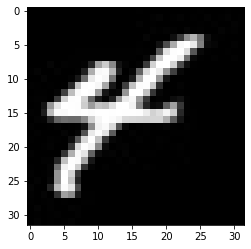

from resize..


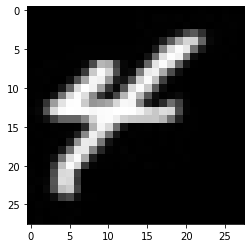

from gray to binary..


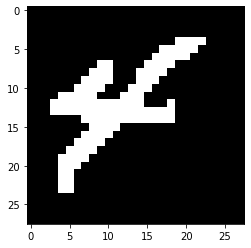

from edge detection..


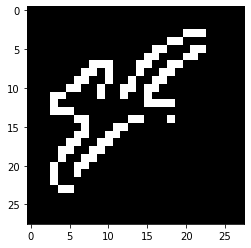

from morpholgy..


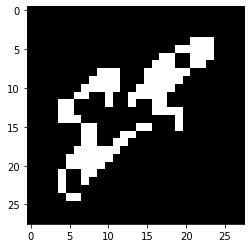

(28, 28)


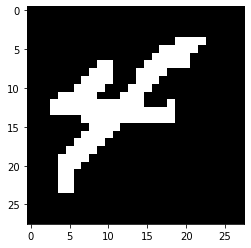

array([[[[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
      

In [71]:
preprocessing('4.jpg')


In [68]:
def cnn_predict(img_path):
    # predict_vec=cnn_model.predict(path_imgto_tensor(img_path))
    #print(predict_vec)
    predict_vec=cnn_model.predict(preprocessing(img_path))
    print(predict_vec)
    return mappings[np.argmax(predict_vec)]

In [73]:
def HWR_rec(img_path):
    plt.imshow(plt.imread(img_path))
    plt.show()
    print('that sing mean .....')
    
    print('using CNN .............' ,cnn_predict(img_path))
#     print('using CNN Augmented....',cnn_Aug_predict(img_path))

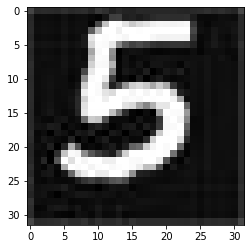

that sing mean .....
from read..


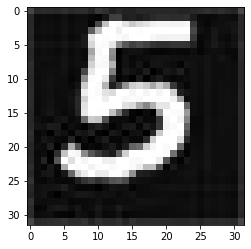

from resize..


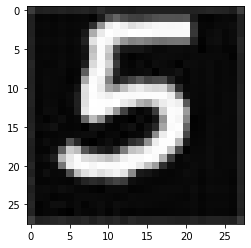

from gray to binary..


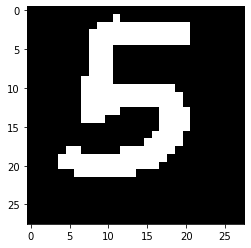

from edge detection..


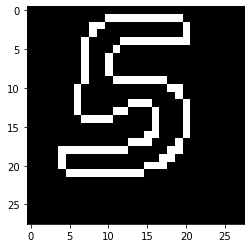

from morpholgy..


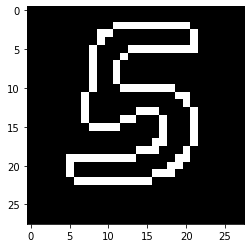

(28, 28)


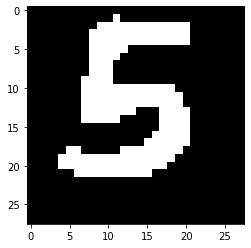

[[1.6570453e-06 1.0024373e-10 6.7413328e-09 7.2257799e-06 1.3612977e-09
  9.9900287e-01 3.2850387e-08 2.5930140e-09 8.6077296e-07 3.5152407e-05
  3.1702641e-10 3.7289086e-05 1.3188269e-08 1.1582391e-06 2.4111889e-06
  6.8130357e-05 1.9469951e-06 3.1673178e-12 4.1210217e-08 4.1355461e-06
  8.3821984e-11 1.0182143e-09 8.6934272e-11 3.0806403e-11 1.1858959e-06
  1.5573040e-09 2.0942672e-07 1.5778181e-12 8.1618229e-04 3.8686530e-09
  1.3439915e-09 6.7850592e-10 1.4530136e-08 1.7692865e-10 1.4154676e-07
  6.8396389e-08 1.3099329e-07 1.1876293e-05 1.2614464e-09 8.3027736e-09
  3.2090128e-07 6.6859729e-06 9.9288265e-08 9.7058157e-09 5.7932446e-08
  1.3187132e-07 5.6401732e-09]]
using CNN ............. 5


In [75]:
immg='5.jpg'
HWR_rec(immg)